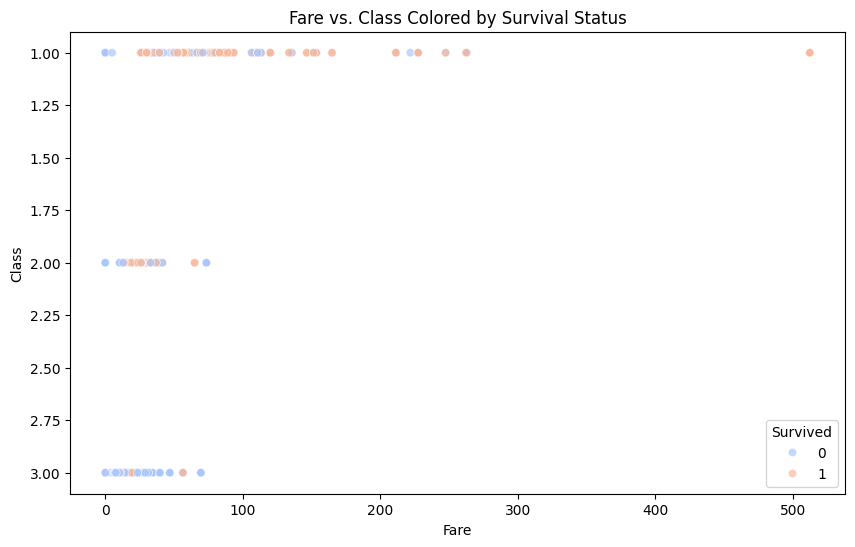

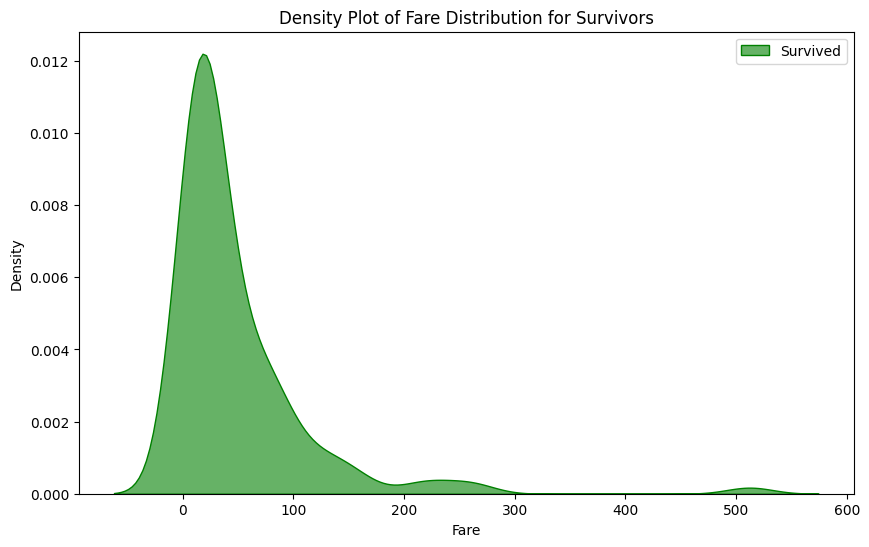

(136,
 Embarked
 S    0.724409
 C    0.188976
 Q    0.086614
 Name: proportion, dtype: float64,
 Who
 child    0.539823
 man      0.165703
 woman    0.752896
 Name: Survived, dtype: float64,
 58.352127659574485)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic_data = pd.read_csv('titanic.csv')

# 1. Find the total number of survivors from the first class.
first_class_survivors = titanic_data[titanic_data['Pclass'] == 1]['Survived'].sum()

# 2. Plot a scatter plot for fare vs. class colored by survival status.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_data, x='Fare', y='Pclass', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Fare vs. Class Colored by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Class')
plt.gca().invert_yaxis()  # Reverse y-axis to align class order
plt.show()

# 3. Calculate the proportion of passengers who embarked from each port.
embarked_proportion = titanic_data['Embarked'].value_counts(normalize=True)

# 4. Analyze the survival rates for passengers in each "who" category.
# Assuming 'who' is derived based on gender and age as categories: 'man', 'woman', 'child'
titanic_data['Who'] = titanic_data.apply(
    lambda x: 'child' if x['Age'] < 18 else ('woman' if x['Sex'] == 'female' else 'man'), axis=1
)
survival_rates_who = titanic_data.groupby('Who')['Survived'].mean()

# 5. Determine the average fare for passengers traveling in large families (family size > 4).
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
large_families = titanic_data[titanic_data['FamilySize'] > 4]
average_fare_large_families = large_families['Fare'].mean()

# 6. Create a density plot for the fare distribution of survivors.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_data[titanic_data['Survived'] == 1], x='Fare', fill=True, color='green', alpha=0.6, label='Survived')
plt.title('Density Plot of Fare Distribution for Survivors')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

# Results
first_class_survivors, embarked_proportion, survival_rates_who, average_fare_large_families
